<h1>
    Project 1 - Analzing Amazon Sales 
</h1>
<h2>
    Problem Statement
</h2>
<p>
    Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise. Do ETL: Extract-Transform-Load some Amazon dataset and find for me Sales-trend &rarr; month-wise, year-wise, yearly_month-wise Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.
</p>
<h2>Content</h2>
<ul>
    <li>Data Cleaning</li>
    <li>Data Visualiation</li>
    <ul>
        <li>Monthly Units Sold, Total Revenue, Total Cost, and Total Profit.</li>
        <li>Yearly Units Sold, Total Revenue, Total Cost, and Total Profit.</li>
        <li>Year-Monthly Units Sold, Total Revenue, Total Cost, and Total Profit.</li>
        <li>Units Sold, Total Revenue, Total Cost, and Total Profit by Sales Channel.</li>
        <li>Units Sold, Total Revenue, Total Cost, and Total Profit by Country.</li>
        <li>Units Sold, Total Revenue, Total Cost, and Total Profit by Region.</li>
    </ul>
</ul>

<h3>Importing Required Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

<h3>Importing the Dataset</h3>

In [2]:
sales_data = pd.read_csv(r"C:\Users\heman\Downloads\Amazon Sales Anaylsis\Amazon Sales data.csv")

<h3>Checking for rows and columns</h3>

In [3]:
rows, cols = sales_data.shape
print(f"Number of rows    : {rows}")
print(f"Number of columns : {cols}")

Number of rows    : 100
Number of columns : 14


<h3>Viewing the data</h3>

In [4]:
pd.options.display.max_rows = rows
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


<h3>Extracting basic info of the data</h3>

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


<h3>Checking no. of Null Values</h3>

In [6]:
print("Column Name","\t","Number of Null values present")
sales_data.isnull().sum()

Column Name 	 Number of Null values present


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

<h3>This sales data have no null values</h3>

<h3>Let's get a describtion</h3>

In [7]:
sales_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


<h3>Plotting a Correlation Chart</h3>

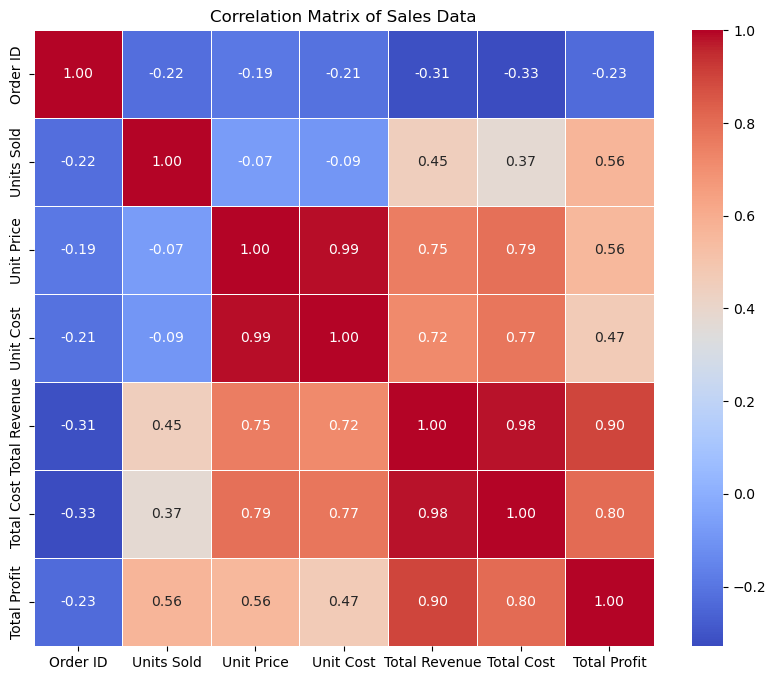

In [8]:
correlation_matrix = sales_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Sales Data')
plt.show()

<h3>From the above heat map we can conclude that :</h3>
<ul>
    <li><b>Units Sold</b>    : Units Sold is highly correlated with Total Profit > Total Revenue > Total Cost.</li>
    <li><b>Total Revenue</b> : Total Revenue is highly correlated with Total Cost > Total Profit > Units Sold.</li>
    <li><b>Total Cost</b>    : Total Cost is highly correlated with Total Revenue > Total Profit > Units Sold.</li>
    <li><b>Total Profit</b>  : Total Profit is highly correlated with Total Revenue > Total Cost > Units Sold.</li>
    
</ul>

<h3> Extracting important attributes </h3>

In [9]:
attributes_to_extract = ['Region', 'Country', 'Sales Channel', 'Order Date', 'Units Sold',
                         'Total Revenue', 'Total Cost', 'Total Profit']
sales_data = sales_data[attributes_to_extract]

<h3>Convert 'Order Date' to datetime</h3>

In [10]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Region         100 non-null    object        
 1   Country        100 non-null    object        
 2   Sales Channel  100 non-null    object        
 3   Order Date     100 non-null    datetime64[ns]
 4   Units Sold     100 non-null    int64         
 5   Total Revenue  100 non-null    float64       
 6   Total Cost     100 non-null    float64       
 7   Total Profit   100 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.4+ KB


<h3>Extracting Year, Month and Year-Month</h3>

In [12]:
# Extract Year and Month
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month

# Extract Year-Month for trend analysis
sales_data['YearMonth'] = sales_data['Order Date'].dt.to_period('M')
sales_data['YearMonth'] = sales_data['Order Date'].apply(lambda x: str(x.year) + '-' + str(x.month))

<h3>Verifying the changes</h3>

In [13]:
sales_data.head(10)

,Region,Country,Sales Channel,Order Date,Units Sold,Total Revenue,Total Cost,Total Profit,Year,Month,YearMonth
0,Australia and Oceania,Tuvalu,Offline,2010-05-28,9925,2533654.00,1582243.50,951410.50,2010,5,2010-5
1,Central America and the Caribbean,Grenada,Online,2012-08-22,2804,576782.80,328376.44,248406.36,2012,8,2012-8
2,Europe,Russia,Offline,2014-05-02,1779,1158502.59,933903.84,224598.75,2014,5,2014-5
3,Sub-Saharan Africa,Sao Tome and Principe,Online,2014-06-20,8102,75591.66,56065.84,19525.82,2014,6,2014-6
4,Sub-Saharan Africa,Rwanda,Offline,2013-02-01,5062,3296425.02,2657347.52,639077.50,2013,2,2013-2
5,Australia and Oceania,Solomon Islands,Online,2015-02-04,2974,759202.72,474115.08,285087.64,2015,2,2015-2
6,Sub-Saharan Africa,Angola,Offline,2011-04-23,4187,2798046.49,2104134.98,693911.51,2011,4,2011-4
7,Sub-Saharan Africa,Burkina Faso,Online,2012-07-17,8082,1245112.92,734896.26,510216.66,2012,7,2012-7
8,Sub-Saharan Africa,Republic of the Congo,Offline,2015-07-14,6070,496101.10,343986.90,152114.20,2015,7,2015-7
9,Sub-Saharan Africa,Senegal,Online,2014-04-18,6593,1356180.10,772106.23,584073.87,2014,4,2014-4


<h3>Applying EDA</h3>

<h3>Calculating Monthly Unit Sold, Total Revenue, Total Cost and Total Profit</h3>

In [14]:
import calendar

month_grouped_data = sales_data.groupby(['Month']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

month_grouped_data['Month'] = month_grouped_data['Month'].apply(lambda x: calendar.month_name[x])

print(month_grouped_data.to_string(index = False))

    Month  Units Sold  Total Revenue  Total Cost  Total Profit
  January       35742    10482467.12  7665610.10    2816857.02
 February       71079    24740517.77 17668467.26    7072050.51
    March       14497     2274823.87  1346472.81     928351.06
    April       44680    16187186.33 11426977.98    4760208.35
      May       63651    13215739.99  8633047.69    4582692.30
     June       34893     5230325.77  3044946.34    2185379.43
     July       76201    15669518.50 10091055.44    5578463.06
   August       17251     1128164.91   548888.24     579276.67
September       30101     5314762.56  2970596.53    2344166.03
  October       55472    15287576.61 10780653.36    4506923.25
 November       53261    20568222.76 14110622.11    6457600.65
 December       16043     7249462.12  4893232.05    2356230.07


<h3>Plotting Monthly Units Sold</h3>

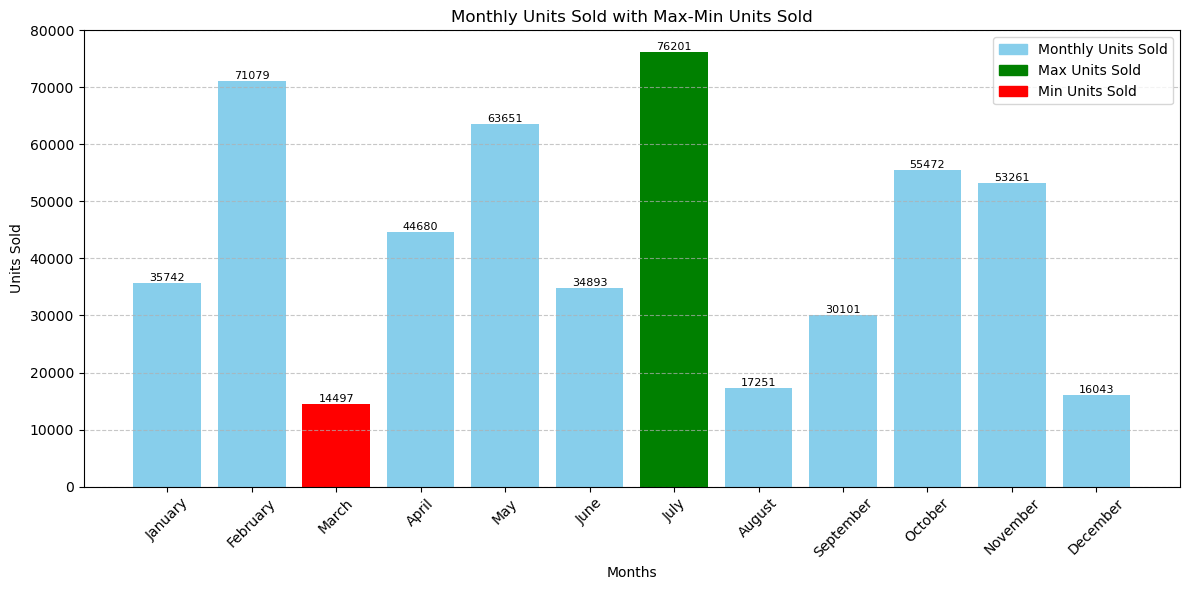

In [15]:
plt.figure(figsize=(12, 6))

plt.bar(month_grouped_data['Month'], month_grouped_data['Units Sold'], color='skyblue', label='Monthly Units Sold')

for month, units_sold in zip(month_grouped_data['Month'], month_grouped_data['Units Sold']):
    plt.text(month, units_sold, str(units_sold), ha='center', va='bottom', fontsize=8)

max_units_month = month_grouped_data.loc[month_grouped_data['Units Sold'].idxmax()]
min_units_month = month_grouped_data.loc[month_grouped_data['Units Sold'].idxmin()]

plt.bar(max_units_month['Month'], max_units_month['Units Sold'], color='green', label='Max Units Sold')
plt.bar(min_units_month['Month'], min_units_month['Units Sold'], color='red', label='Min Units Sold')

legend_patches = [
    mpatches.Patch(color='skyblue', label='Monthly Units Sold'),
    mpatches.Patch(color='green', label='Max Units Sold'),
    mpatches.Patch(color='red', label='Min Units Sold')
]

plt.legend(handles=legend_patches)

plt.xlabel('Months')
plt.ylabel('Units Sold')
plt.title('Monthly Units Sold with Max-Min Units Sold')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<h3>From the data represented in the bar chart, we can conclude that :</h3>
<ul>
    <li>Most Monthly units were sold in <b>July</b></li>
    <li>Least Mpnthly units were sold in <b>March</b></li>
</ul>

<h3>Plotting Monthly Total Revenue</h3>

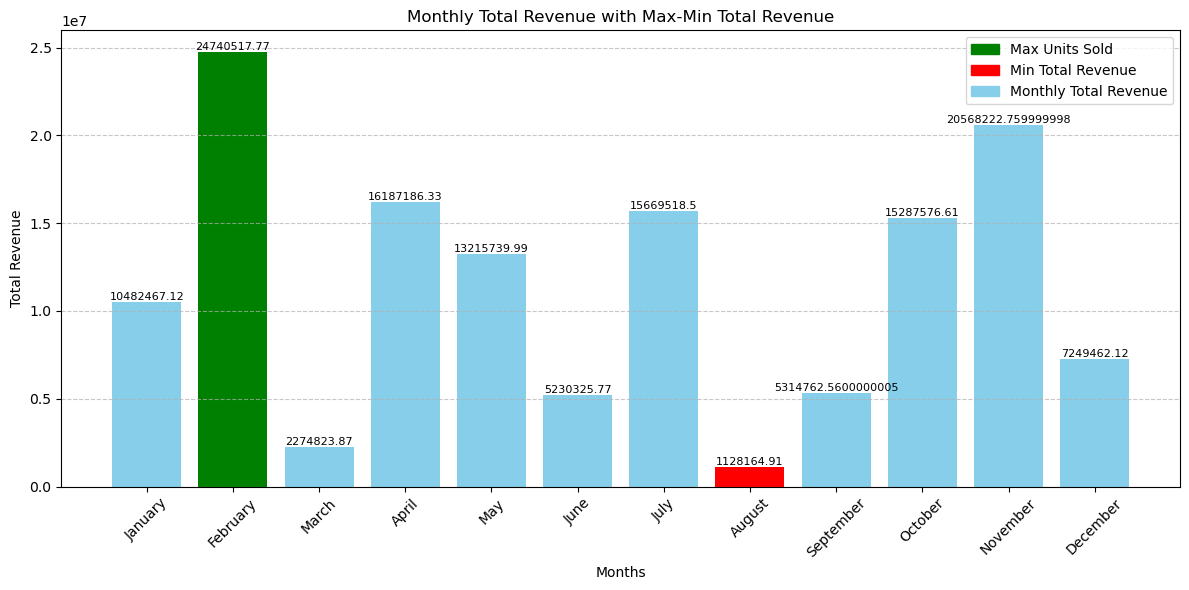

In [16]:
plt.figure(figsize=(12, 6))

bars = plt.bar(month_grouped_data['Month'], month_grouped_data['Total Revenue'], color='skyblue', label='Monthly Total Revenue')

for bar, total_revenue in zip(bars, month_grouped_data['Total Revenue']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(total_revenue), ha='center', va='bottom', fontsize=8)

legend_patches = []
for i, (month, total_revenue) in enumerate(zip(month_grouped_data['Month'], month_grouped_data['Total Revenue'])):
    if total_revenue == max(month_grouped_data['Total Revenue']):
        color = 'green'
        label='Max Total Revenue'
        plt.bar(month, total_revenue, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label='Max Units Sold'))
        
    elif total_revenue == min(month_grouped_data['Total Revenue']):
        color = 'red'
        label='Min Total Revenue'
        plt.bar(month, total_revenue, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label='Min Total Revenue'))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Monthly Total Revenue'))
        
plt.legend(handles=legend_patches)
plt.xlabel('Months')
plt.ylabel('Total Revenue')
plt.title('Monthly Total Revenue with Max-Min Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>From the data represented in the bar chart, we can conclude that :</h3>
<ul>
    <li>Most total revenue was generated in <b>February</b></li>
    <li>Least total revenue was generated in <b>August</b></li>
</ul>

<h3>Plotting Monthly Total Cost</h3>

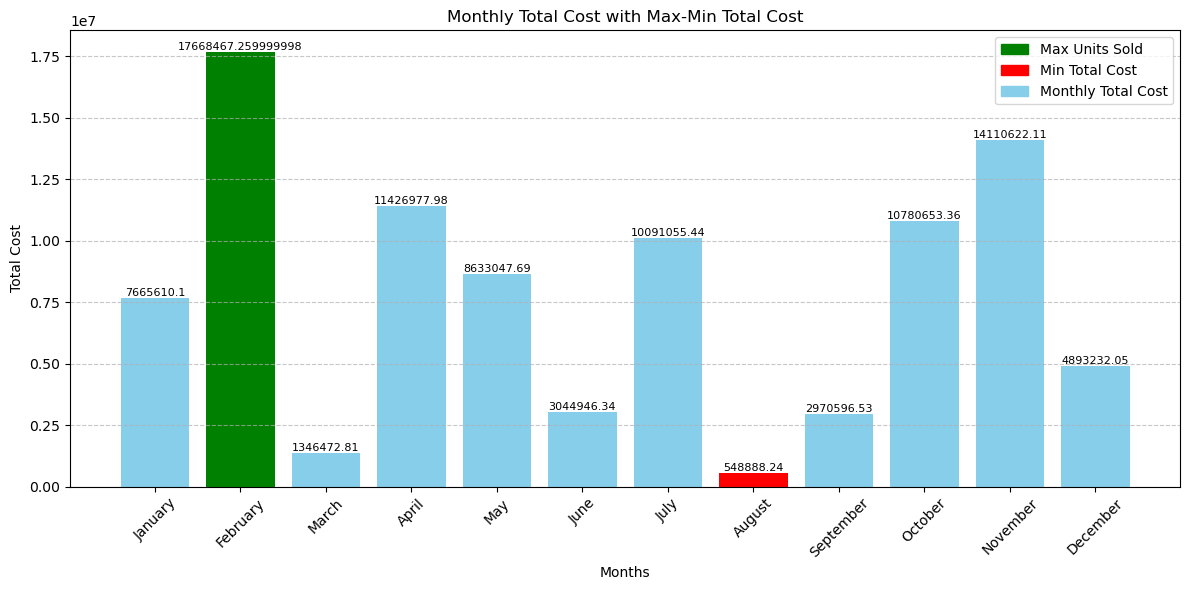

In [17]:
plt.figure(figsize=(12, 6))

bars = plt.bar(month_grouped_data['Month'], month_grouped_data['Total Cost'], color='skyblue', label='Monthly Total Cost')

for bar, total_cost in zip(bars, month_grouped_data['Total Cost']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(total_cost), ha='center', va='bottom', fontsize=8)

legend_patches = []
for i, (month, total_cost) in enumerate(zip(month_grouped_data['Month'], month_grouped_data['Total Cost'])):
    if total_cost == max(month_grouped_data['Total Cost']):
        color = 'green'
        label='Max Total Cost'
        plt.bar(month, total_cost, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label='Max Units Sold'))
        
    elif total_cost == min(month_grouped_data['Total Cost']):
        color = 'red'
        label='Min Total Cost'
        plt.bar(month, total_cost, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label='Min Total Cost'))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Monthly Total Cost'))
        
plt.legend(handles=legend_patches)
plt.xlabel('Months')
plt.ylabel('Total Cost')
plt.title('Monthly Total Cost with Max-Min Total Cost')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>From the data represented in the bar chart, we can conclude that :</h3>
<ul>
    <li>Most Monthly Total Cost was generated in <b>February</b></li>
    <li>Least Monthly Total Cost was generated in <b>August</b></li>
</ul>

<h3>Plotting Monthly Total Profit</h3>

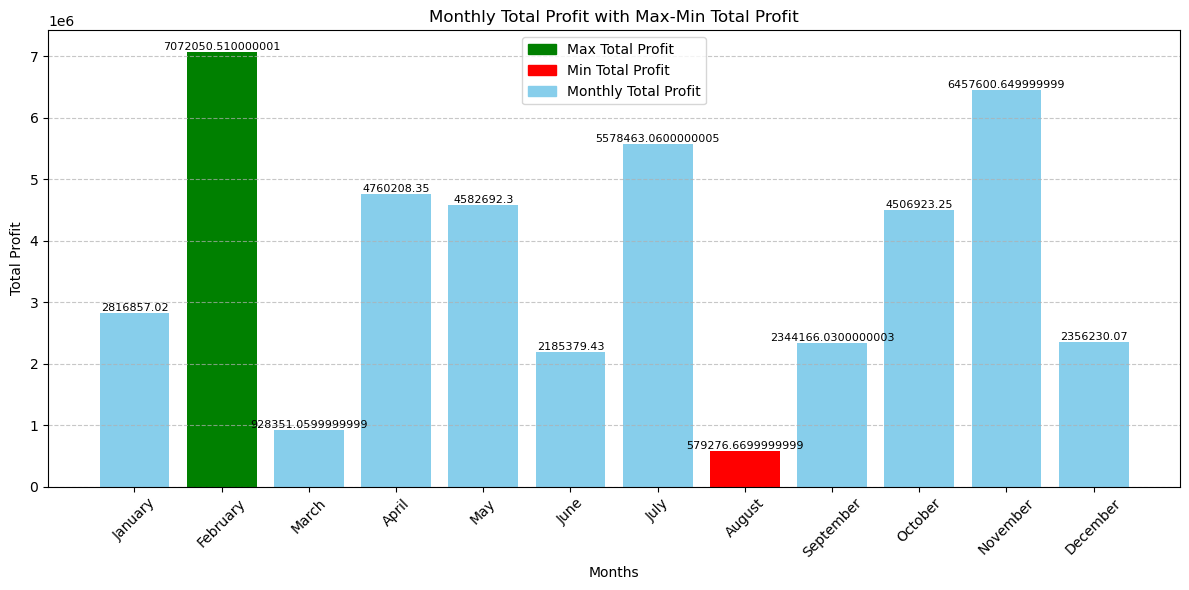

In [18]:
plt.figure(figsize=(12, 6))

bars = plt.bar(month_grouped_data['Month'], month_grouped_data['Total Profit'], color='skyblue', label='Monthly Total Profit')

for bar, total_profit in zip(bars, month_grouped_data['Total Profit']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(total_profit), ha='center', va='bottom', fontsize=8)

legend_patches = []
for i, (month, total_profit) in enumerate(zip(month_grouped_data['Month'], month_grouped_data['Total Profit'])):
    if total_profit == max(month_grouped_data['Total Profit']):
        color = 'green'
        label='Max Total Profit'
        plt.bar(month, total_profit, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label='Max Total Profit'))
        
    elif total_profit == min(month_grouped_data['Total Profit']):
        color = 'red'
        label='Min Total Profit'
        plt.bar(month, total_profit, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label='Min Total Profit'))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Monthly Total Profit'))
        
plt.legend(handles=legend_patches)
plt.xlabel('Months')
plt.ylabel('Total Profit')
plt.title('Monthly Total Profit with Max-Min Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>From the data represented in the bar chart, we can conclude that :</h3>
<ul>
    <li>Most Monthly Total Profit was generated in <b>February</b></li>
    <li>Least Monthly Total Profit was generated in <b>August</b></li>
</ul>

<h2>From all the above charts we can conclude that :</h2>
<ul>
    <li>February is the month where Total Revenue, Total Cost and Total Profit were the highest.</li>
    <li>August is the month where Total Revenue, Total Cost and Total Profit were the least.</li>
    <li>Whereas for the Units Sold July is the month with highest Units Sold and March is the month with least Units sold</li>
</ul>

<h3>Calculating Yearly Unit Sold, Total Revenue, Total Cost and Total Profit</h3>

In [19]:
year_grouped_data = sales_data.groupby(['Year']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

print(year_grouped_data.to_string(index = False))

 Year  Units Sold  Total Revenue  Total Cost  Total Profit
 2010       61571    19186024.92 12556457.49    6629567.43
 2011       54768    11129166.07  8388157.84    2741008.23
 2012       97967    31898644.52 22685634.40    9213010.12
 2013       64663    20330448.66 13615028.62    6715420.04
 2014       92040    16630214.43 10750752.75    5879461.68
 2015       49480    12427982.86  8431443.42    3996539.44
 2016       43156    12372867.22  7469029.21    4903838.01
 2017       49226    13373419.63  9284066.18    4089353.45


<h3>Plotting Yearly Units Sold</h3>

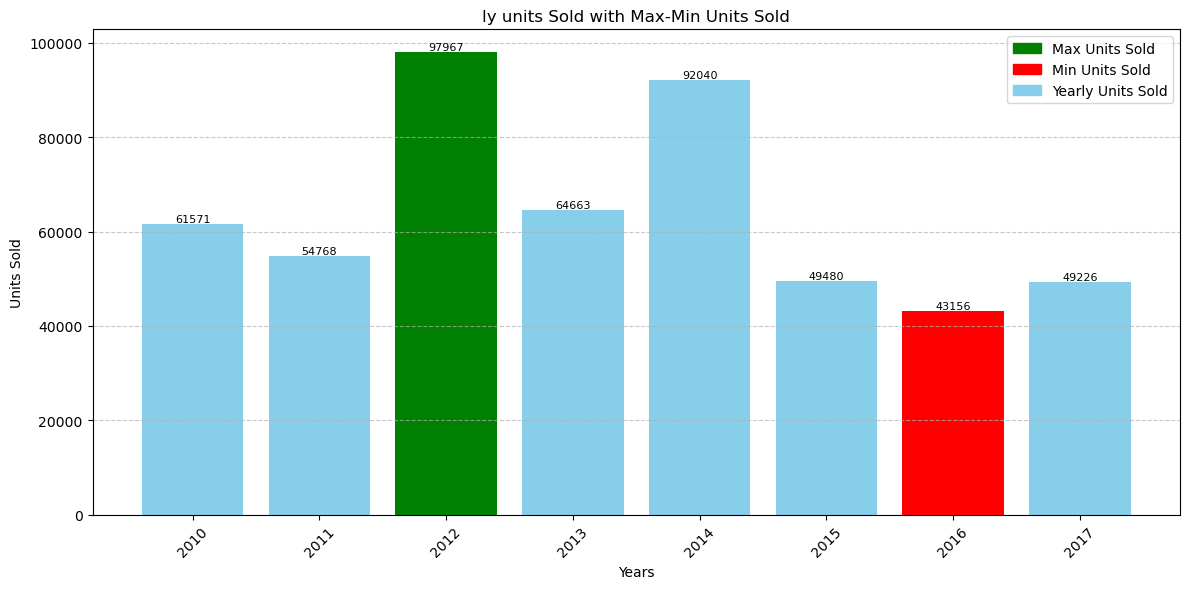

In [20]:
plt.figure(figsize=(12, 6))

bars = plt.bar(year_grouped_data['Year'], year_grouped_data['Units Sold'], color='skyblue', label='Yearly Units Sold')

for bar, units_sold in zip(bars, year_grouped_data['Units Sold']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(units_sold), ha='center', va='bottom', fontsize=8)

legend_patches = []
for i, (year, units_sold) in enumerate(zip(year_grouped_data['Year'], year_grouped_data['Units Sold'])):
    if units_sold == max(year_grouped_data['Units Sold']):
        color = 'green'
        label='Max Units Sold'
        plt.bar(year, units_sold, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label='Max Units Sold'))
        
    elif units_sold == min(year_grouped_data['Units Sold']):
        color = 'red'
        label='Min Units Sold'
        plt.bar(year, units_sold, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label='Min Units Sold'))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Yearly Units Sold'))
        
plt.legend(handles=legend_patches)
plt.xlabel('Years')
plt.ylabel('Units Sold')
plt.title('ly units Sold with Max-Min Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most Yearly Units Sold was in <b>2012</b></li>
    <li>Least Yearly Units Sold was in <b>2016</b></li>
</ul>

<h3>Plotting Yearly Total Revenue</h3>

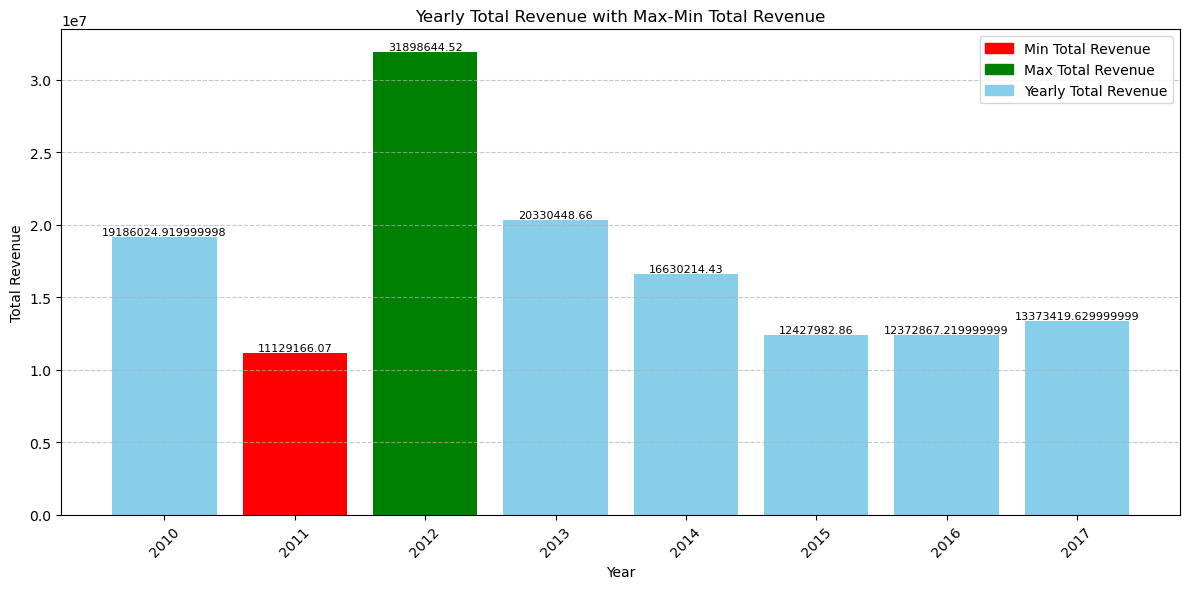

In [21]:
plt.figure(figsize=(12, 6))

bars = plt.bar(year_grouped_data['Year'], year_grouped_data['Total Revenue'], color='skyblue', label='Yearly Total Revenue')

for bar, total_revenue in zip(bars, year_grouped_data['Total Revenue']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(total_revenue), ha='center', va='bottom', fontsize=8)

legend_patches = []
for year, total_revenue in zip(year_grouped_data['Year'], year_grouped_data['Total Revenue']):
    if total_revenue == max(year_grouped_data['Total Revenue']):
        color = 'green'
        label = 'Max Total Revenue'
        plt.bar(year, total_revenue, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label=label))
    elif total_revenue == min(year_grouped_data['Total Revenue']):
        color = 'red'
        label = 'Min Total Revenue'
        plt.bar(year, total_revenue, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label=label))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Yearly Total Revenue'))

plt.legend(handles=legend_patches)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Total Revenue with Max-Min Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most Yealy Total Revenue was generated in <b>2012</b></li>
    <li>Least Yearly Total Revenue was generated in <b>2011</b></li>
</ul>

<h3>Plotting Yearly Total Cost</h3>

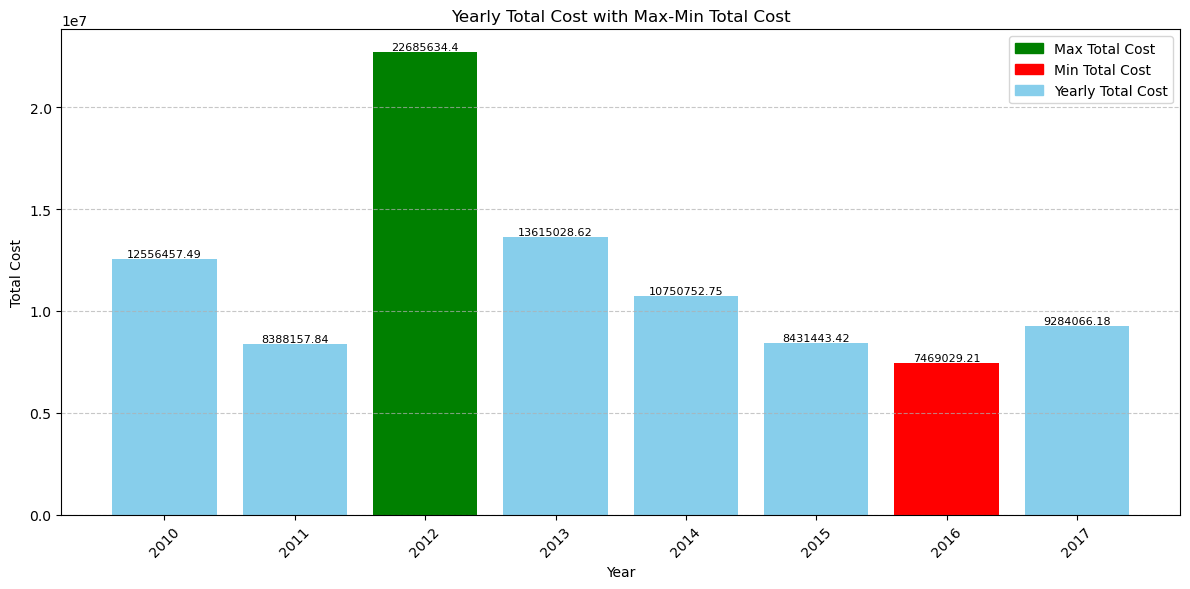

In [22]:
plt.figure(figsize=(12, 6))

bars = plt.bar(year_grouped_data['Year'], year_grouped_data['Total Cost'], color='skyblue', label='Yearly Total Cost')

for bar, total_cost in zip(bars, year_grouped_data['Total Cost']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(total_cost), ha='center', va='bottom', fontsize=8)

legend_patches = []
for year, total_cost in zip(year_grouped_data['Year'], year_grouped_data['Total Cost']):
    if total_cost == max(year_grouped_data['Total Cost']):
        color = 'green'
        label = 'Max Total Cost'
        plt.bar(year, total_cost, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label=label))
    elif total_cost == min(year_grouped_data['Total Cost']):
        color = 'red'
        label = 'Min Total Cost'
        plt.bar(year, total_cost, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label=label))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Yearly Total Cost'))

plt.legend(handles=legend_patches)
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.title('Yearly Total Cost with Max-Min Total Cost')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most Yearly Total Cost was in <b>2012</b></li>
    <li>Least Yearly Total Cost was in <b>2016</b></li>
</ul>

<h3>Plotting Yearly Total Profit</h3>

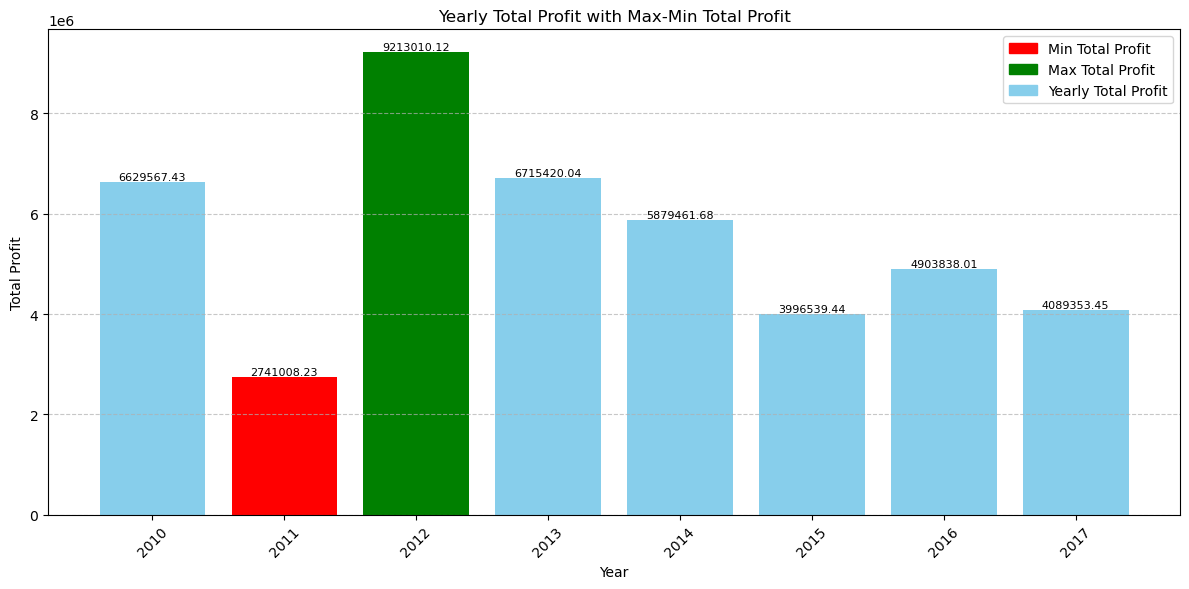

In [23]:
plt.figure(figsize=(12, 6))

bars = plt.bar(year_grouped_data['Year'], year_grouped_data['Total Profit'], color='skyblue', label='Yearly Total Profit')

for bar, total_profit in zip(bars, year_grouped_data['Total Profit']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(total_profit), ha='center', va='bottom', fontsize=8)

legend_patches = []
for year, total_profit in zip(year_grouped_data['Year'], year_grouped_data['Total Profit']):
    if total_profit == max(year_grouped_data['Total Profit']):
        color = 'green'
        label = 'Max Total Profit'
        plt.bar(year, total_profit, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label=label))
    elif total_profit == min(year_grouped_data['Total Profit']):
        color = 'red'
        label = 'Min Total Profit'
        plt.bar(year, total_profit, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label=label))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Yearly Total Profit'))

plt.legend(handles=legend_patches)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Yearly Total Profit with Max-Min Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most Yearly Total Profit was generated in <b>2012</b></li>
    <li>Least Yearly Total Profit was generated in <b>2011</b></li>
</ul>

<h2>From all the above charts we can conclude that :</h2>
<ul>
    <li><b>2012</b> is the year where Units Sold, Total Revenue, Total Cost and Total Profit were the highest.</li>
    <li><b>2016</b> is the year where Units Sold and Total Cost were the least.</li>
    <li>Whereas <b>2011</b> is the year where Total Revenue and Total Profit were the least.</li>
</ul>

<h3>Calculating Year-Month Unit Sold, Total Revenue, Total Cost and Total Profit</h3>

In [24]:
year_monthly_data = sales_data.groupby('YearMonth').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

print(year_monthly_data.to_string(index = False))

YearMonth  Units Sold  Total Revenue  Total Cost  Total Profit
  2010-10       14403     6064933.75  4569540.96    1495392.79
  2010-11        7910     3458252.00  2082940.30    1375311.70
  2010-12        4103     2581786.39  1940199.11     641587.28
   2010-2        9503     3410661.12  1986250.18    1424410.94
   2010-5       15747     2587973.26  1622531.74     965441.52
   2010-6        9905     1082418.40   354995.20     727423.20
   2011-1       12914     1042225.35   678716.31     363509.04
  2011-11       19026     5938385.58  4781068.92    1157316.66
   2011-2        8156      387002.20   259279.24     127722.96
   2011-4        4187     2798046.49  2104134.98     693911.51
   2011-5        5741      272410.45   182506.39      89904.06
   2011-6         124       19103.44    11275.32       7828.12
   2011-7         888       97040.64    31825.92      65214.72
   2011-9        3732      574951.92   339350.76     235601.16
   2012-1        1548     1012884.00   806315.64     20

<h3>Plotting Year-Monthly Units Sold</h3>

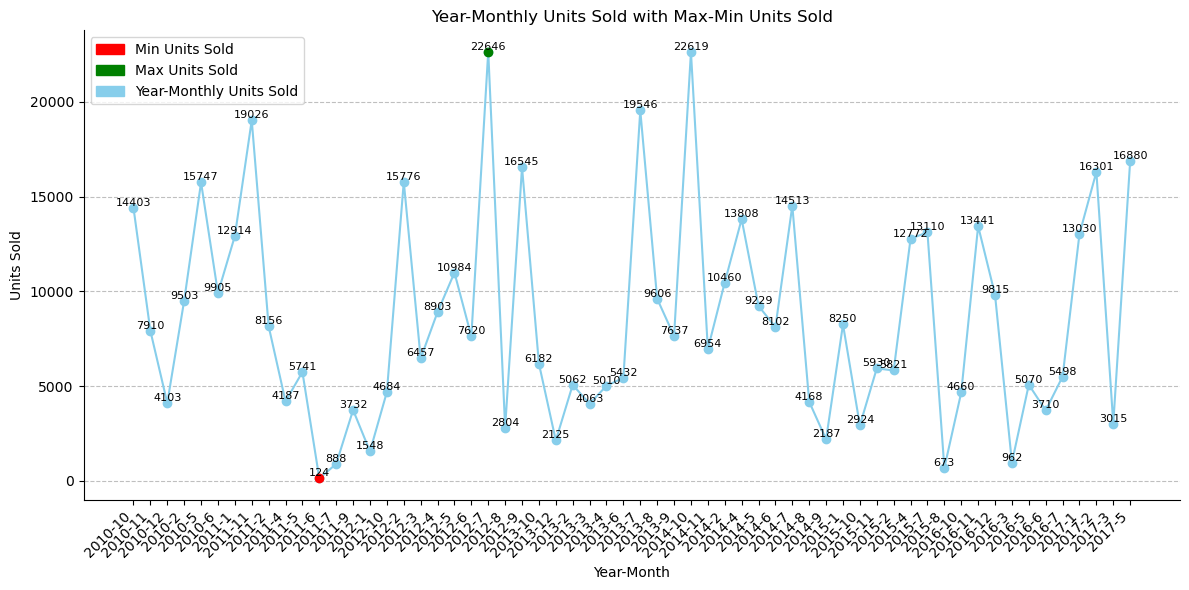

In [25]:
plt.figure(figsize=(12, 6))

plt.plot(year_monthly_data['YearMonth'], year_monthly_data['Units Sold'], color='skyblue', 
         label='Year-Monthly Units Sold', marker='o')

for x, y in zip(year_monthly_data['YearMonth'], year_monthly_data['Units Sold']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

legend_patches = []
for yearmonth, units_sold in zip(year_monthly_data['YearMonth'], year_monthly_data['Units Sold']):
    if units_sold == max(year_monthly_data['Units Sold']):
        color = 'green'
        label = 'Max Units Sold'
        plt.plot(yearmonth, units_sold, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='green', label=label))
        
    elif units_sold == min(year_monthly_data['Units Sold']):
        color = 'red'
        label = 'Min Units Sold'
        plt.plot(yearmonth, units_sold, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='red', label=label))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Year-Monthly Units Sold'))

plt.legend(handles=legend_patches, loc='upper left', fontsize='medium')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.title('Year-Monthly Units Sold with Max-Min Units Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.grid(color='gray', linestyle='--', alpha=0.5)

plt.show()

<h3>From the above line chart we can conclude that :</h3>
<ul>
    <li>Most Year-Month wise Units Sold was in <b>2012-7</b></li>
    <li>Least Year-Month wise Units Sold was in <b>2011-6</b></li>
</ul>

<h3>Plotting Year-Monthly Total Revenue</h3>

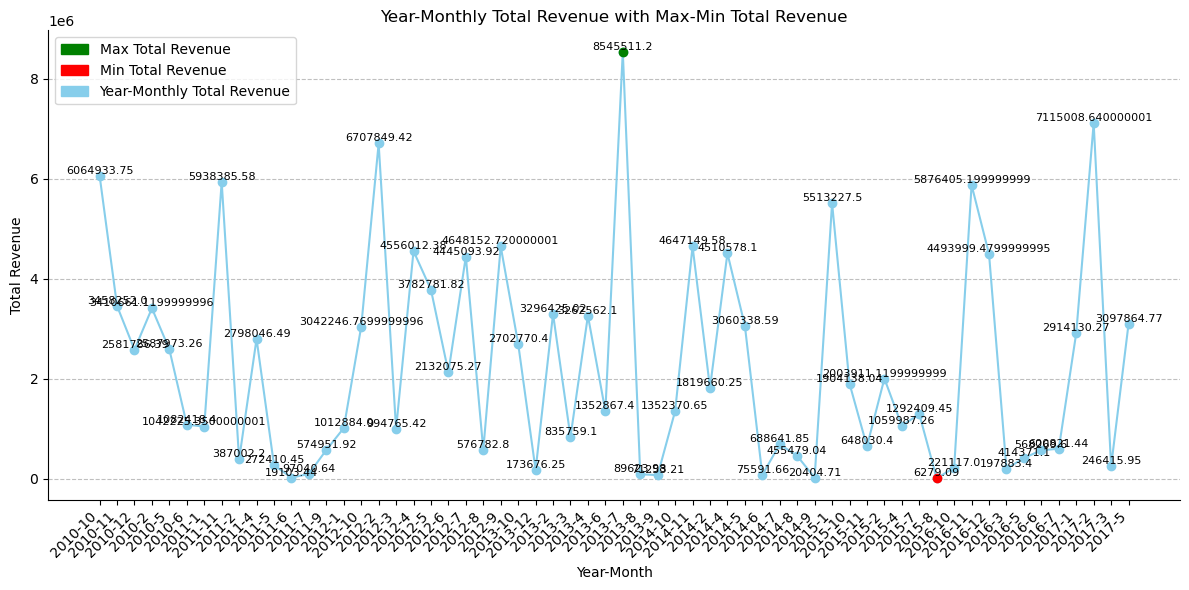

In [26]:
plt.figure(figsize=(12, 6))

plt.plot(year_monthly_data['YearMonth'], year_monthly_data['Total Revenue'], color='skyblue', 
         label='Year-Monthly Total Revenue', marker='o')

for x, y in zip(year_monthly_data['YearMonth'], year_monthly_data['Total Revenue']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

legend_patches = []
for yearmonth, total_revenue in zip(year_monthly_data['YearMonth'], year_monthly_data['Total Revenue']):
    if total_revenue == max(year_monthly_data['Total Revenue']):
        color = 'green'
        label = 'Max Total Revenue'
        plt.plot(yearmonth, total_revenue, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='green', label=label))
    elif total_revenue == min(year_monthly_data['Total Revenue']):
        color = 'red'
        label = 'Min Total Revenue'
        plt.plot(yearmonth, total_revenue, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='red', label=label))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Year-Monthly Total Revenue'))

plt.legend(handles=legend_patches, loc='upper left', fontsize='medium')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.title('Year-Monthly Total Revenue with Max-Min Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.grid(color='gray', linestyle='--', alpha=0.5)

plt.show()

<h3>From the above line chart we can conclude that :</h3>
<ul>
    <li>Most Year-Month wise Total Revenue was in <b>2013-7</b></li>
    <li>Least Year-Month wise Total Revenue was in <b>2015-8</b></li>
</ul>

<h3>Plotting Year-Monthly Total Cost</h3>

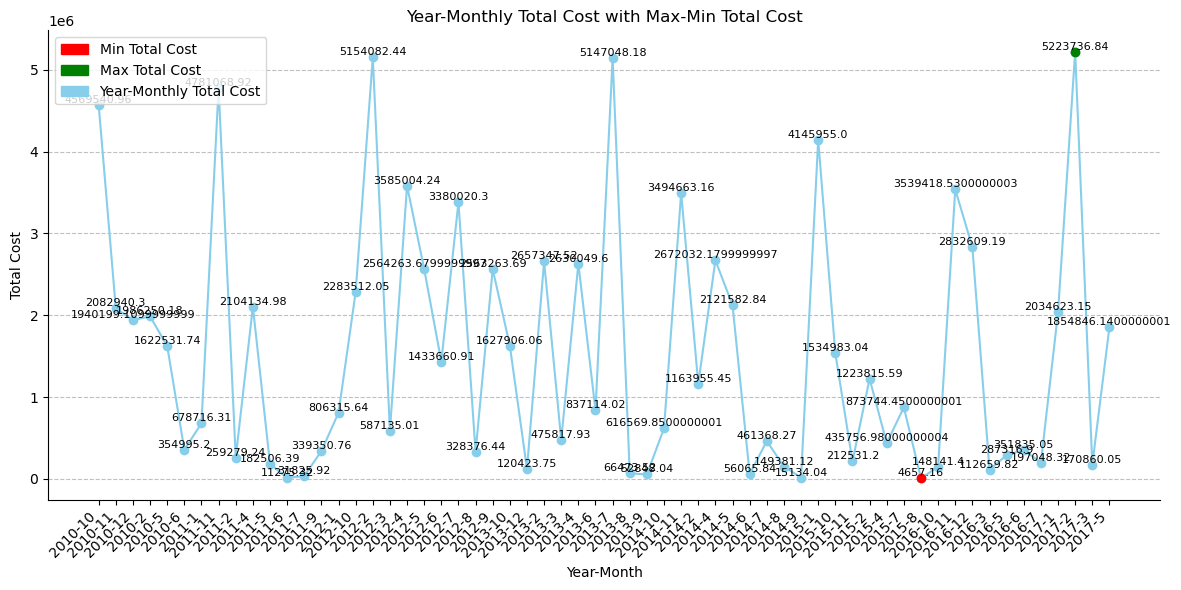

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(year_monthly_data['YearMonth'], year_monthly_data['Total Cost'], color='skyblue', 
         label='Year-Monthly Total Cost', marker='o')

for x, y in zip(year_monthly_data['YearMonth'], year_monthly_data['Total Cost']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

legend_patches = []
for yearmonth, total_cost in zip(year_monthly_data['YearMonth'], year_monthly_data['Total Cost']):
    if total_cost == max(year_monthly_data['Total Cost']):
        color = 'green'
        label = 'Max Total Cost'
        plt.plot(yearmonth, total_cost, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='green', label=label))
    elif total_cost == min(year_monthly_data['Total Cost']):
        color = 'red'
        label = 'Min Total Cost'
        plt.plot(yearmonth, total_cost, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='red', label=label))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Year-Monthly Total Cost'))

plt.legend(handles=legend_patches, loc='upper left', fontsize='medium')
plt.xlabel('Year-Month')
plt.ylabel('Total Cost')
plt.title('Year-Monthly Total Cost with Max-Min Total Cost')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.grid(color='gray', linestyle='--', alpha=0.5)

plt.show()

<h3>From the above line chart we can conclude that :</h3>
<ul>
    <li>Most Year-MOnth wise Total Cost was in <b>2017-1</b></li>
    <li>Least Year-Month wise Total Cost was in <b>2015-8</b></li>
</ul>

<h3>Plotting Year-Monthly Total Profit</h3>

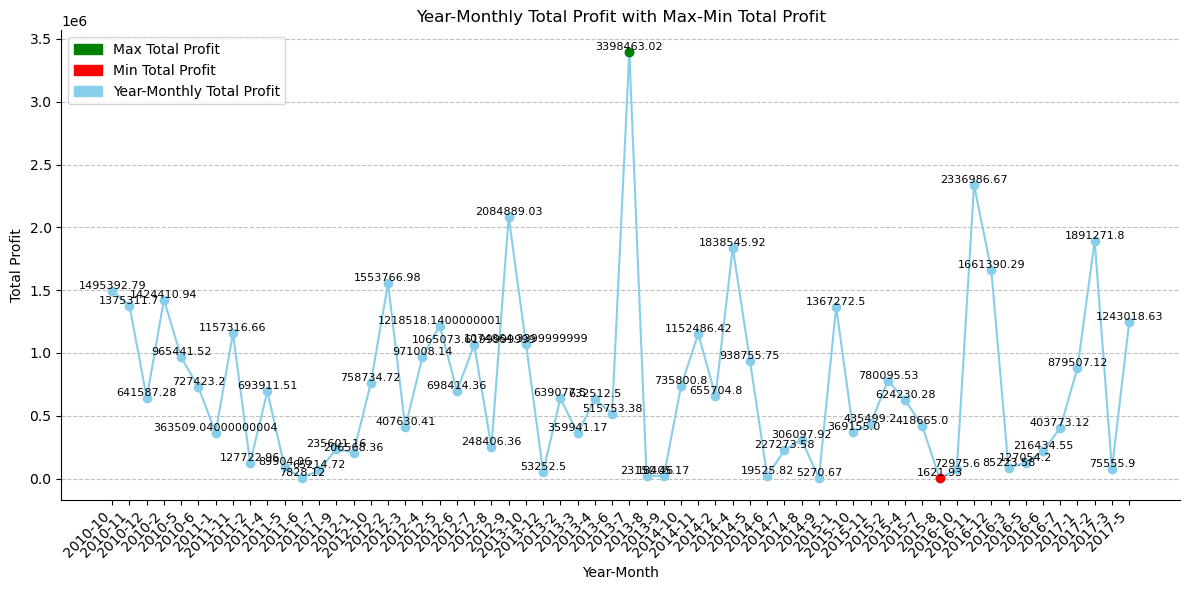

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(year_monthly_data['YearMonth'], year_monthly_data['Total Profit'], color='skyblue', 
         label='Year-Monthly Total Profit', marker='o')

for x, y in zip(year_monthly_data['YearMonth'], year_monthly_data['Total Profit']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

legend_patches = []
for yearmonth, total_profit in zip(year_monthly_data['YearMonth'], year_monthly_data['Total Profit']):
    if total_profit == max(year_monthly_data['Total Profit']):
        color = 'green'
        label = 'Max Total Profit'
        plt.plot(yearmonth, total_profit, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='green', label=label))
    elif total_profit == min(year_monthly_data['Total Profit']):
        color = 'red'
        label = 'Min Total Profit'
        plt.plot(yearmonth, total_profit, color=color, marker='o', label=label)
        legend_patches.append(mpatches.Patch(color='red', label=label))
    else:
        continue
        
legend_patches.append(mpatches.Patch(color='skyblue', label='Year-Monthly Total Profit'))

plt.legend(handles=legend_patches, loc='upper left', fontsize='medium')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.title('Year-Monthly Total Profit with Max-Min Total Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.grid(color='gray', linestyle='--', alpha=0.5)

plt.show()

<h3>From the above line chart we can conclude that :</h3>
<ul>
    <li>Most Year-Month wise Total Profit was in <b>2013-7</b></li>
    <li>Least Year-Month wise Total Profit was in <b>2015-8</b></li>
</ul>

<h2>From all the above charts we can conclude that :</h2>
<ul>
    <li><b>2012-7</b> is the year-month where Units Sold were the highest.</li>
    <li><b>2013-7</b> is the year-month where Total Revenue and Total Profit were the highest.</li>
    <li><b>2017-1</b> is the year where Total Cost were the highest.</li>
    <li><b>2015-8</b> is the year-month where Total Revenue, Total Cost and Total Profit were the least.</li>
    <li><b>2011-6</b> is the year where Units Sold were the least.</li>
</ul>

###

<h3>Grouping Units Sold, Total Revenue, Total Cost and Total Profit by Sales Channel</h3>

In [29]:
sales_channel_grouped_data = sales_data.groupby(['Sales Channel']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

print(sales_channel_grouped_data.to_string(index = False))

Sales Channel  Units Sold  Total Revenue  Total Cost  Total Profit
      Offline      276782    79094809.20 54174082.53   24920726.67
       Online      236089    58253959.11 39006487.38   19247471.73


<h3>Plotting Units Sold, Total Revenue, Total Cost and Total Profit by sales Channel</h3>

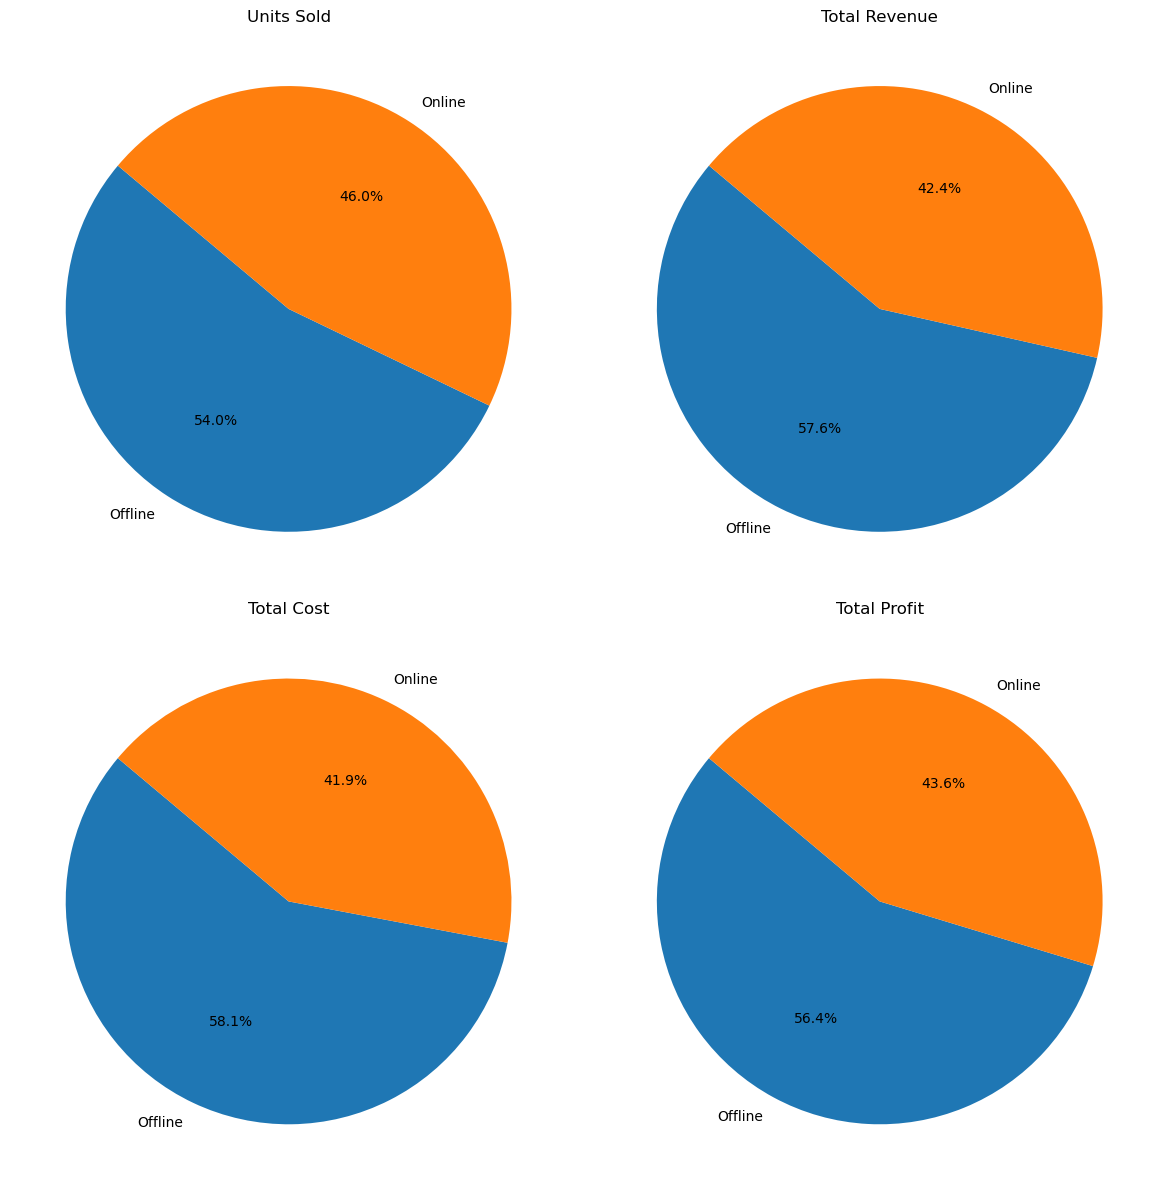

In [30]:
labels = sales_channel_grouped_data['Sales Channel']
units_sold = sales_channel_grouped_data['Units Sold']
total_revenue = sales_channel_grouped_data['Total Revenue']
total_cost = sales_channel_grouped_data['Total Cost']
total_profit = sales_channel_grouped_data['Total Profit']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].pie(units_sold, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Units Sold')

axes[0, 1].pie(total_revenue, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Total Revenue')

axes[1, 0].pie(total_cost, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Total Cost')

axes[1, 1].pie(total_profit, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Total Profit')

plt.tight_layout()
plt.show()

<h3>From the above pie charts we can conclude that :</h3>
<ul>
    <li>Most Units Sold, Total Revenue, Total Cost, and Total Profit were in <b>Offline Channel</b> in all four charts.</li>
    <li>But the difference between the channels is quite low.</li>
</ul>

<h3>Grouping Units Sold, Total Revenue, Total Cost and Total Profit by Country</h3>

In [31]:
country_grouped_data = sales_data.groupby(['Country']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

print(country_grouped_data.to_string(index = False))

                         Country  Units Sold  Total Revenue  Total Cost  Total Profit
                         Albania        2269      247956.32    81320.96     166635.36
                          Angola        4187     2798046.49  2104134.98     693911.51
                       Australia       12995     2489933.49  1913328.37     576605.12
                         Austria        2847     1244708.40   749700.51     495007.89
                      Azerbaijan        9255     4478800.21  2965873.38    1512926.83
                      Bangladesh        8263      902980.64   296145.92     606834.72
                          Belize        5498      600821.44   197048.32     403773.12
                          Brunei        6708     4368316.68  3521431.68     846885.00
                        Bulgaria        5660     2779199.71  2152975.84     626223.87
                    Burkina Faso        8082     1245112.92   734896.26     510216.66
                        Cameroon       10948     38510

<h3>Plotting Units Sold, Total Revenue, Total Cost and Total Profit by Country</h3>

### Units Sold by Country

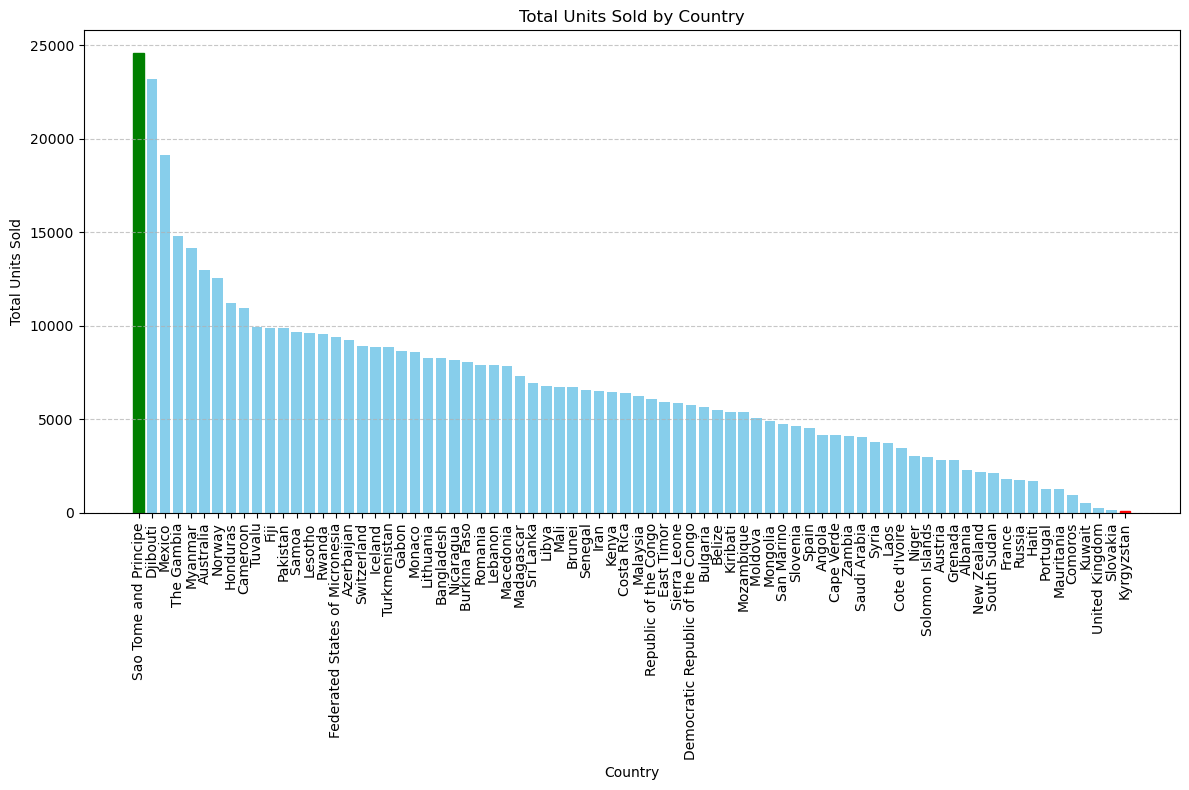

In [32]:
sorted_data = country_grouped_data.sort_values(by='Units Sold', ascending=False)

plt.figure(figsize=(12, 8))

bars = plt.bar(sorted_data['Country'], sorted_data['Units Sold'], color='skyblue')

max_value = sorted_data['Units Sold'].max()
min_value = sorted_data['Units Sold'].min()

for bar, units_sold in zip(bars, sorted_data['Units Sold']):
    if units_sold == max_value:
        bar.set_color('green')
    elif units_sold == min_value:
        bar.set_color('red')

plt.xlabel('Country')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Country')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most Units Sold in <b>Sao Tome and Principe</b> among all other country</li>
    <li>Least Units Sold in <b>Kyrgyzstan</b> among all other country</li>
</ul>

### Total Revenue by Country

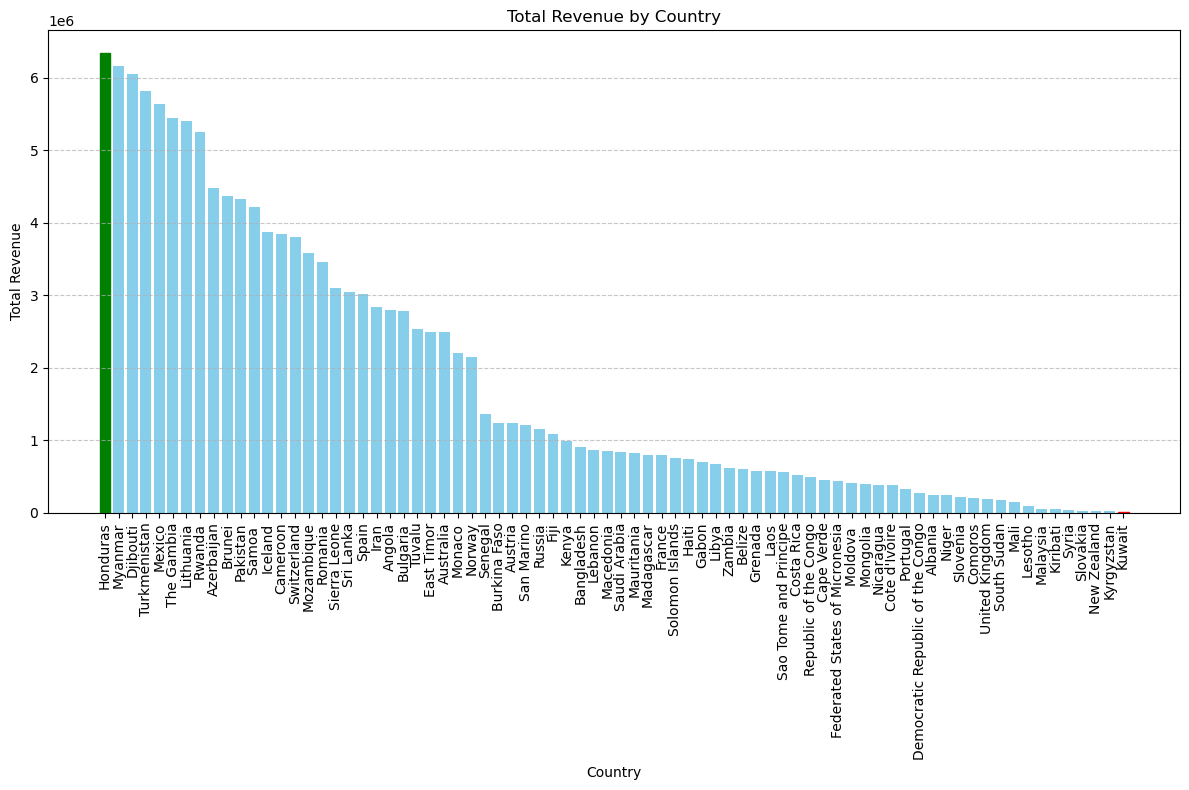

In [33]:
sorted_data = country_grouped_data.sort_values(by='Total Revenue', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_data['Country'], sorted_data['Total Revenue'], color='skyblue')

max_value = sorted_data['Total Revenue'].max()
min_value = sorted_data['Total Revenue'].min()

for bar, total_revenue in zip(bars, sorted_data['Total Revenue']):
    if total_revenue == max_value:
        bar.set_color('green')
    elif total_revenue == min_value:
        bar.set_color('red')

plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most Total Revenue generated in <b>Honduras</b> among all other country.</li>
    <li>Least Total Revenue generated in <b>Kuwait</b> among all other country.</li>
    <li>We can also see most Units sold in <b>Sao Tome and Principe</b> but here in regarding to revenue it's not even in <b>top 10.</b></li>
    <li>But we could say that <b>kyrgzstan</b> is the 2nd least in generating revenue.</li>
</ul>

### Total Cost by Country

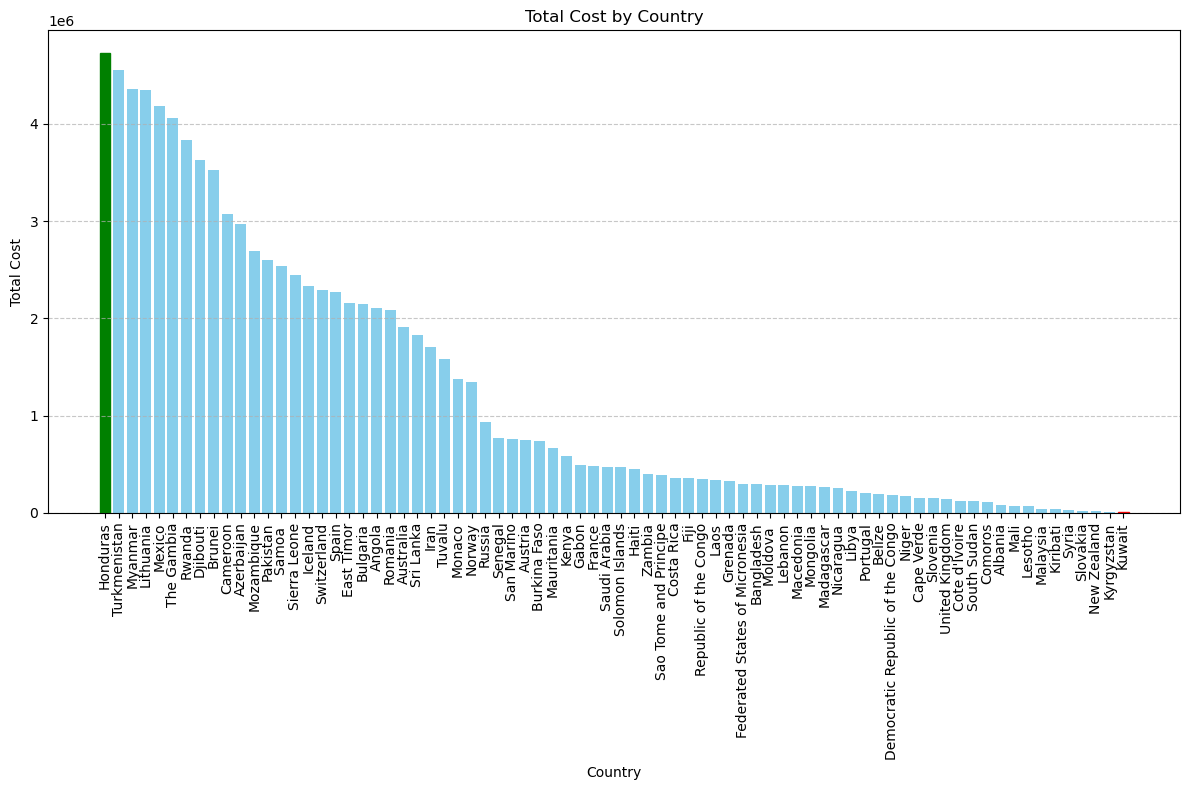

In [34]:
sorted_data = country_grouped_data.sort_values(by='Total Cost', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_data['Country'], sorted_data['Total Cost'], color='skyblue')

max_value = sorted_data['Total Cost'].max()
min_value = sorted_data['Total Cost'].min()

for bar,total_cost in zip(bars, sorted_data['Total Cost']):
    if total_cost == max_value:
        bar.set_color('green')
    elif total_cost == min_value:
        bar.set_color('red')

plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.title('Total Cost by Country')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most of Total Cost were in <b>Honduras</b> again among all other country</li>
    <li>Least of Total Cost were in <b>Kuwait</b> again among all other country</li>
    <li>As we can see total revenue and total cost highly correlated to each other that's why the highest and lowest total cost and total revenue are the same but we can see the countries Least of Total Cost were in <b>Kuwait</b> again among all other country</li>
    <li>We can also see most Units sold were in the <b>Sao Tome and Principe</b> but here in regarding to revenue, it's not even in <b>top 10 </b></li>
</ul>

### Total Profit by Country

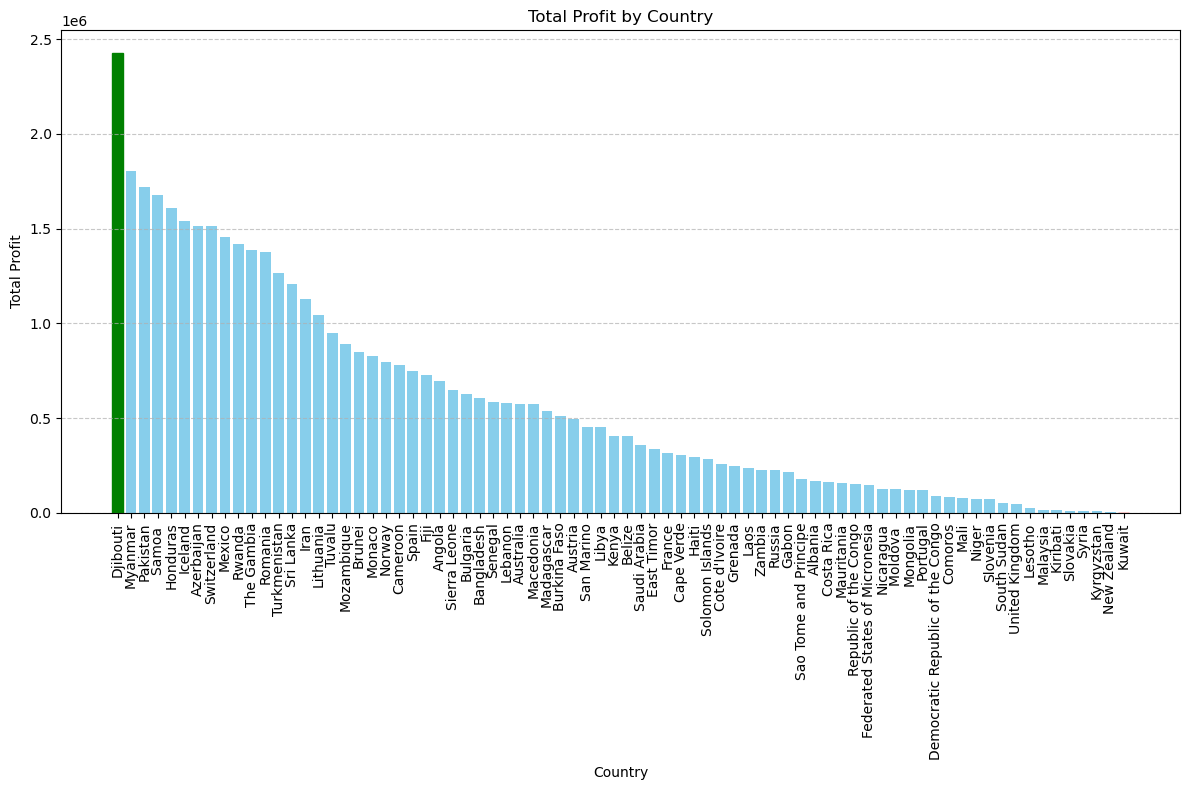

In [35]:
sorted_data = country_grouped_data.sort_values(by='Total Profit', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_data['Country'], sorted_data['Total Profit'], color='skyblue')

max_value = sorted_data['Total Profit'].max()
min_value = sorted_data['Total Profit'].min()

for bar, total_profit in zip(bars, sorted_data['Total Profit']):
    if total_profit == max_value:
        bar.set_color('green')
    elif total_profit == min_value:
        bar.set_color('red')

plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total Profit by Country')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>From the above bar chart we can conclude that :</h3>
<ul>
    <li>Most Total Profit were in <b>Dijbouti</b> among all other country</li>
    <li>Least of Total Profit were in <b>Kuwait</b> again among all other country</li>
    <li>We can also see most Units sold in <b>Sao Tome and Principe</b> but here in regarding to revenue, it's not even in <b>top 10 </b></li>
</ul>

<h3>Grouping Units Sold, Total Revenue, Total Cost and Total Profit by Region</h3>

In [36]:
region_grouped_data = sales_data.groupby(['Region']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

print(region_grouped_data.to_string(index = False))

                           Region  Units Sold  Total Revenue  Total Cost  Total Profit
                             Asia       59967    21347091.02 15233245.15    6113845.87
            Australia and Oceania       68325    14094265.13  9372105.10    4722160.03
Central America and the Caribbean       35771     9170385.49  6323477.64    2846907.85
                           Europe       98117    33368932.11 22285993.48   11082938.63
     Middle East and North Africa       48678    14052706.58  8291514.72    5761191.86
                    North America       19143     5643356.55  4185413.79    1457942.76
               Sub-Saharan Africa      182870    39672031.43 27488820.03   12183211.40


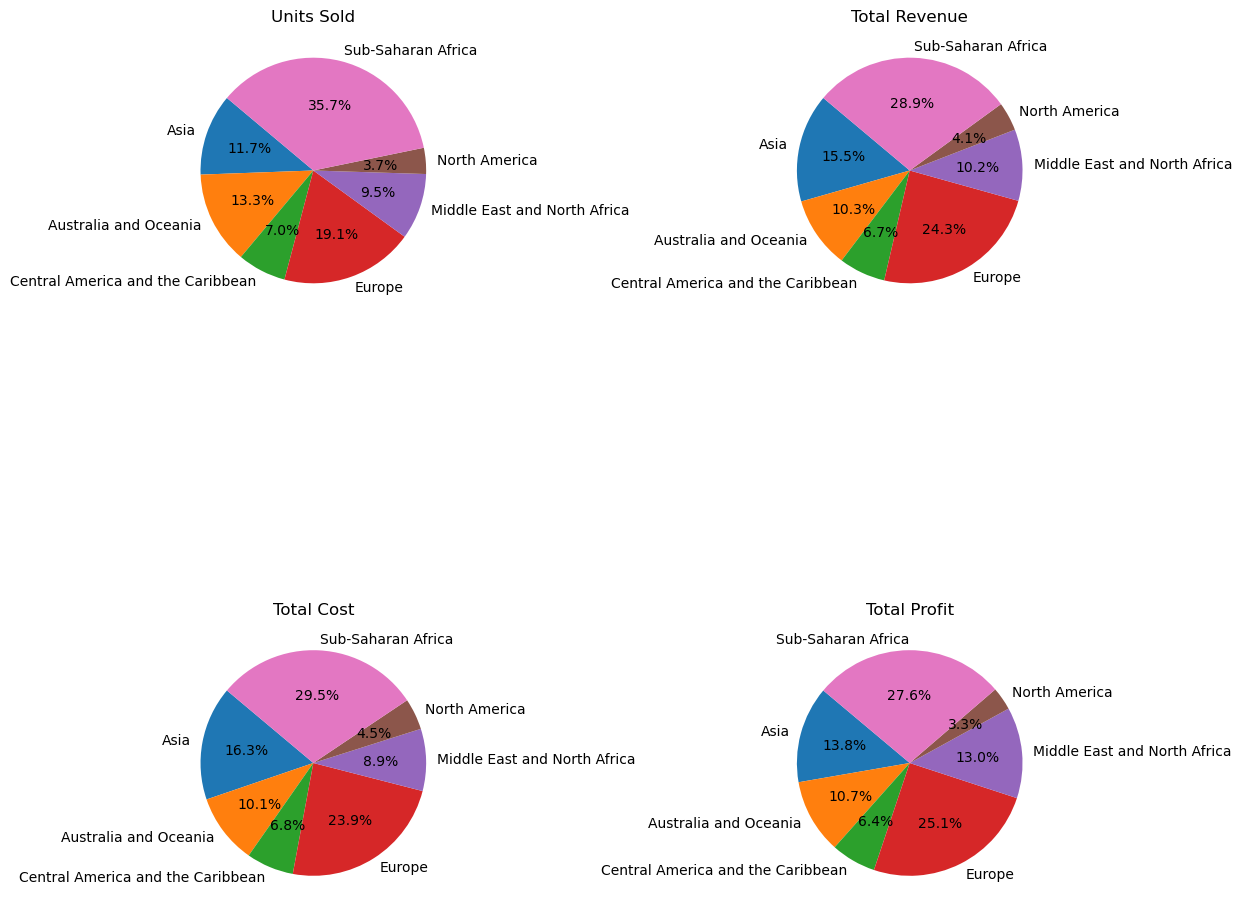

In [37]:
labels = region_grouped_data['Region']
units_sold = region_grouped_data['Units Sold']
total_revenue = region_grouped_data['Total Revenue']
total_cost = region_grouped_data['Total Cost']
total_profit = region_grouped_data['Total Profit']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].pie(units_sold, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Units Sold')

axes[0, 1].pie(total_revenue, labels=labels, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Total Revenue')

axes[1, 0].pie(total_cost, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Total Cost')

axes[1, 1].pie(total_profit, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Total Profit')

plt.tight_layout()
plt.show()

<h3>From the pie charts we can conclude that :</h3>
<ul>
    <li>Most Units Sold, Total Revenue, Total Cost and Total Profit in the <b>Sub-Saharan Africa</b> region.</li>
    <li>Least Units Sold, Total Revenue, Total Cost and Total Profit in <b>North America</b> Region.</li>
</ul>

<h3>Conclusion</h3>

<ol>
    <li>February month had the highest Monthly Revenue.</li>
    <li>2012 year had the highest Yearly Revenue.</li>
    <li>July 2013 had the highest Year-Monthly Revenue.</li>
    <li>The highest revenue was generated by Offline sales channel.</li>
    <li>Honduras was the country who had generated highest revenue among all.</li>
    <li>Sub-Saharan Africa is the region which generated highest revenue among all.</li>  
</ol>